### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра математического моделирования и искусственного интеллекта

## ОТЧЕТ ПО КОНТРОЛЬНОЙ РАБОТЕ № 3


### Дисциплина: Методы машинного обучения

##### Студент:  Миронов Дмитрий Андреевич
##### Группа:   НПИ-02-21

## Москва 2024
***

### Вариант №28



In [24]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math

1.	Постройте тензор ранга 1 (вектор) со значениями заданной в индивидуальном задании функции одной переменной f(x) = (1-e^(-2x))^0.5 на заданном в индивидуальном задании отрезке [1,5] и определите максимальное и минимальное значения функции.

In [25]:
def f(x):
    return tf.sqrt(1 - tf.exp(-2 * x))

x_values = tf.constant(np.linspace(1, 5, 100), dtype=tf.float32)
y_values = f(x_values)
max_value = tf.reduce_max(y_values)
min_value = tf.reduce_min(y_values)

print("Максимальное значение функции:", max_value.numpy())
print("Минимальное значение функции:", min_value.numpy())

Максимальное значение функции: 0.9999773
Минимальное значение функции: 0.9298735


2.	Постройте график функции с прямыми, соответствующими максимальному и минимальному значениям, подписывая оси и рисунок и создавая легенду.

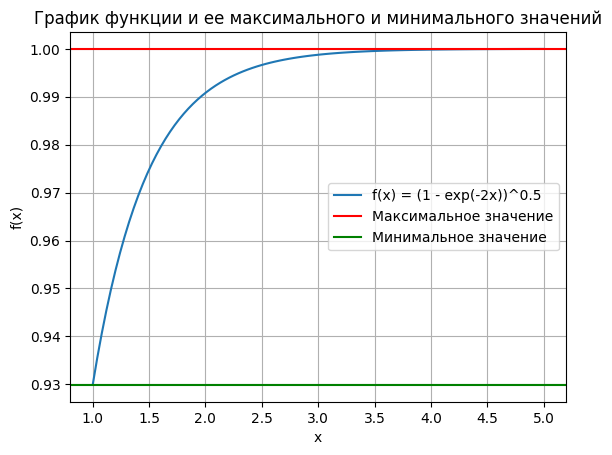

In [26]:
plt.plot(x_values, y_values, label='f(x) = (1 - exp(-2x))^0.5')
plt.axhline(max_value, color='r', linestyle='-', label='Максимальное значение')
plt.axhline(min_value, color='g', linestyle='-', label='Минимальное значение')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('График функции и ее максимального и минимального значений')
plt.legend()
plt.grid(True)
plt.show()

3.	Найдите значения производной от функции 4 порядка, и постройте график полученной функции, подписывая оси и рисунок.

In [27]:
# Вычисление производных
with tf.GradientTape() as gt1:
    gt1.watch(x_values)
    with tf.GradientTape() as gt2:
        gt2.watch(x_values)
        with tf.GradientTape() as gt3:
            gt3.watch(x_values)
            with tf.GradientTape() as gt4:
                gt4.watch(x_values)
                y = tf.sqrt(1 - tf.exp(-2 * x_values))
            dydx = gt4.gradient(y, x_values)     # Первая производная
        d2ydx2 = gt3.gradient(dydx, x_values)  # Вторая производная
    d3ydx3 = gt2.gradient(d2ydx2, x_values)    # Третья производная
d4ydx4 = gt1.gradient(d3ydx3, x_values)        # Четвёртая производная



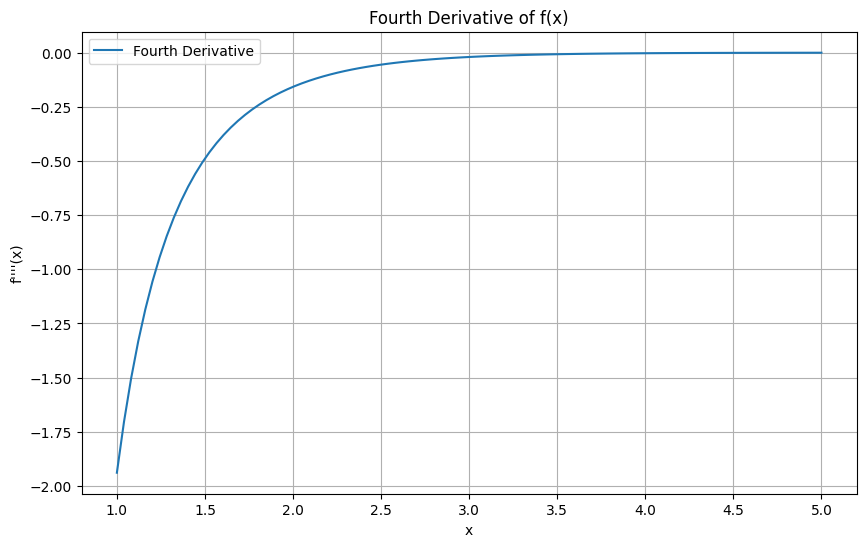

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(x_values, d4ydx4, label="Fourth Derivative")
plt.title("Fourth Derivative of f(x)")
plt.xlabel("x")
plt.ylabel("f''''(x)")
plt.grid(True)
plt.legend()
plt.show()

4.	Постройте тензор ранга 2 (матрицу) со значениями заданной в индивидуальном задании функции двух переменных на заданном в индивидуальном задании прямоугольнике и определите максимальное и минимальное значения функции.

In [29]:
x_values1 = np.linspace(0, 2, 100)
y_values1 = np.linspace(0, 3, 100)
X, Y = tf.meshgrid(x_values1, y_values1)
Z = tf.math.exp(-X)*tf.math.sin(Y)

max = tf.reduce_max(Z)
min = tf.reduce_min(Z)

print(f'Максимальное знач. функции: {max}')
print(f'Минимальное знач. функции: {min}')

Максимальное знач. функции: 0.9999876930296089
Минимальное знач. функции: 0.0


5.	Постройте 3d график поверхности функции двух переменных, подписывая оси и рисунок.

In [30]:
from matplotlib import cm

Text(0.5, 0.92, 'График поверхности функции двух переменных')

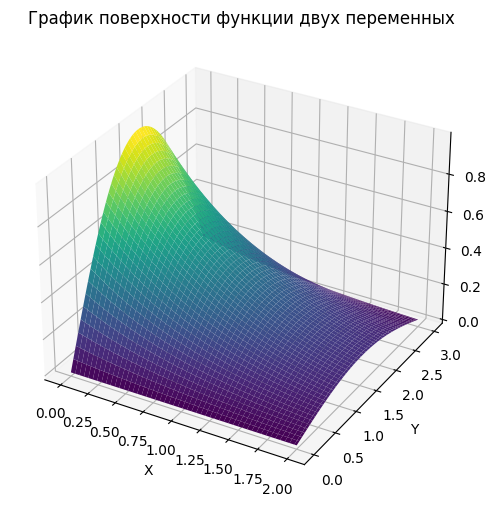

In [31]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('График поверхности функции двух переменных')

6.	Найдите значения смешанной производной от функции порядка, указанного в индивидуальном задании, и постройте 3d график поверхности полученной функции, подписывая оси и рисунок.

In [32]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Определение функции
def f(x, y):
    return tf.math.exp(-x) * tf.math.sin(y)

# Определение смешанной производной четвертого порядка
def fourth_mixed_derivative(x, y):
    with tf.GradientTape() as tape1:
        tape1.watch(x)
        with tf.GradientTape() as tape2:
            tape2.watch(x)
            with tf.GradientTape() as tape3:
                tape3.watch(x)
                with tf.GradientTape() as tape4:
                    tape4.watch(x)
                    f_value = f(x, y)
                d4_f_d_x3 = tape4.gradient(f_value, x)
            d3_f_d_x3 = tape3.gradient(d4_f_d_x3, x)
        d2_f_d_x2 = tape2.gradient(d3_f_d_x3, x)
    d_f_d_x = tape1.gradient(d2_f_d_x2, x)

    with tf.GradientTape() as tape5:
        tape5.watch(y)
        d_f_d_y = tape5.gradient(f(x, y), y)

    return d_f_d_y * d3_f_d_x3



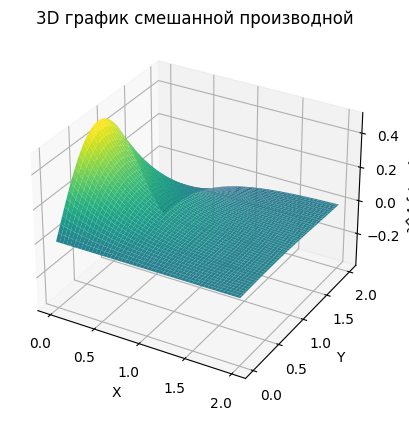

In [33]:
# Создание данных для построения графика
x = tf.convert_to_tensor(np.linspace(0, 2, 100), dtype=tf.float32)
y = tf.convert_to_tensor(np.linspace(0, 2, 100), dtype=tf.float32)
X, Y = tf.meshgrid(x, y)
Z = fourth_mixed_derivative(X, Y)

# Построение графика
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

# Подпись осей и графика
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('∂^4 f / ∂x^3∂y')
ax.set_title('3D график смешанной производной')

# Отображение графика
plt.show()

7.	Решите задачу парной линейной регрессии при помощи модели TensorFlow, рассматривая тензор ранга 1 из пункта 1 задания как значения зависимой переменной (отклика), а точки отрезка из индивидуального задания как значения независимой переменной (предиктора). Предварительно масштабируйте независимую и зависимую переменные на интервал [0, 1]. Оцените качество полученной модели по показателю качества регрессии, указанному в индивидуальном задании. Количество эпох, скорость обучения и начальные значения весов выберите самостоятельно, обеспечивая сходимость обучения.

Масштабируем независимую и зависимую переменную:

In [34]:
x_m = (x_values - tf.reduce_min(x_values))/(tf.reduce_max(x_values) - tf.reduce_min(x_values))
y_m = (y_values - tf.reduce_min(y_values))/(tf.reduce_max(y_values) - tf.reduce_min(y_values))

Зададим класс для модели парной линейной регрессии:

In [35]:
class Model(object):
    def __init__(self):
        self.w = tf.Variable(5.)
        self.b = tf.Variable(6.)

    def __call__(self, x):
        return self.w * x + self.b

model = Model()

Будем использовать функцию потерь: среднее квадратичное логарифмическое отклонение (MaxError)

In [36]:
def max_error(predicted_y, target_y):
    return tf.math.reduce_max(tf.abs(target_y - predicted_y))

Реализуем базовый градиентный спуск:

In [37]:
def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as t:
        current_loss = max_error(model(inputs), outputs)
    dw, db = t.gradient(current_loss, [model.w, model.b])
    model.w.assign_sub(learning_rate * dw)
    model.b.assign_sub(learning_rate * db)
    return current_loss

Запустим цикл обучения:

In [38]:
epochs = 300
maxError_values = []
for epoch in range(epochs):
    current_loss = train(model, x_m, y_m, learning_rate=0.1)
    maxError_values.append(current_loss)
    if (epoch + 1) % 10 == 0:
      print('Эпоха %2d: MaxError=%2.5f' % (epoch, current_loss))

Эпоха  9: MaxError=8.20000
Эпоха 19: MaxError=6.20000
Эпоха 29: MaxError=4.20001
Эпоха 39: MaxError=2.20001
Эпоха 49: MaxError=1.10000
Эпоха 59: MaxError=0.33822
Эпоха 69: MaxError=0.32973
Эпоха 79: MaxError=0.32124
Эпоха 89: MaxError=0.33955
Эпоха 99: MaxError=0.33106
Эпоха 109: MaxError=0.32257
Эпоха 119: MaxError=0.34061
Эпоха 129: MaxError=0.33265
Эпоха 139: MaxError=0.32416
Эпоха 149: MaxError=0.34195
Эпоха 159: MaxError=0.33371
Эпоха 169: MaxError=0.32575
Эпоха 179: MaxError=0.34360
Эпоха 189: MaxError=0.33477
Эпоха 199: MaxError=0.32681
Эпоха 209: MaxError=0.34526
Эпоха 219: MaxError=0.33636
Эпоха 229: MaxError=0.32787
Эпоха 239: MaxError=0.31996
Эпоха 249: MaxError=0.33795
Эпоха 259: MaxError=0.32946
Эпоха 269: MaxError=0.32098
Эпоха 279: MaxError=0.33955
Эпоха 289: MaxError=0.33106
Эпоха 299: MaxError=0.32257


8. Постройте кривую обучения для показателя качества регрессии, указанного в индивидуальном задании, с зависимостью от количества эпох. Показатель качества регрессия реализуйте как функцию с использованием функций модуля tf.math.

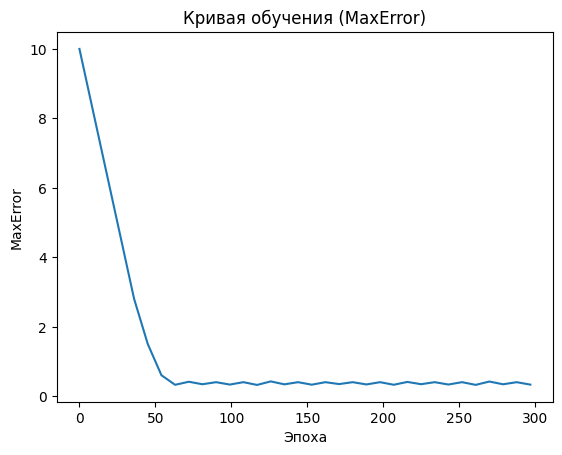

In [39]:
plt.plot(range(0, epochs,9), maxError_values[::9])
plt.xlabel('Эпоха')
plt.ylabel('MaxError')
plt.title('Кривая обучения (MaxError)')
plt.show()

9. Изобразите на графике точки набора данных (независимой и зависимой переменных) и линию построенной парной регрессии, подписывая оси и рисунок и создавая легенду.

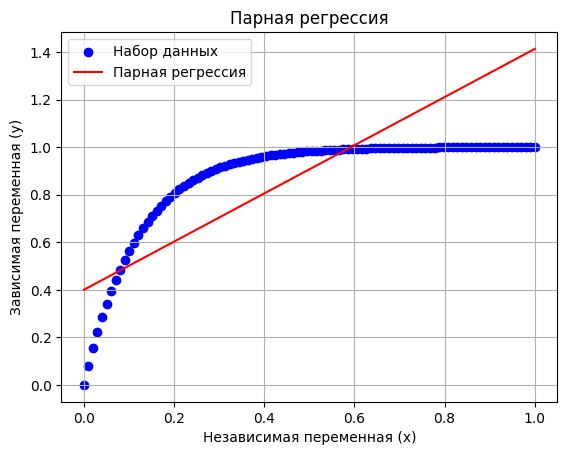

In [40]:
plt.scatter(x_m, y_m, label='Набор данных', color='blue')

predicted_y = model(x_m)
plt.plot(x_m, predicted_y, label='Парная регрессия', color='red')
plt.xlabel('Независимая переменная (x)')
plt.ylabel('Зависимая переменная (y)')
plt.title('Парная регрессия')
plt.legend()
plt.grid(True)